In [1]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.optimizers import Adam, SGD

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

D:\anacinda\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('./data/diabetes.csv')

In [5]:
X=df[['BloodPressure']].values
y_true=df[['Age']].values

In [6]:
X

array([[ 72],
       [ 66],
       [ 64],
       [ 66],
       [ 40],
       [ 74],
       [ 50],
       [  0],
       [ 70],
       [ 96],
       [ 92],
       [ 74],
       [ 80],
       [ 60],
       [ 72],
       [  0],
       [ 84],
       [ 74],
       [ 30],
       [ 70],
       [ 88],
       [ 84],
       [ 90],
       [ 80],
       [ 94],
       [ 70],
       [ 76],
       [ 66],
       [ 82],
       [ 92],
       [ 75],
       [ 76],
       [ 58],
       [ 92],
       [ 78],
       [ 60],
       [ 76],
       [ 76],
       [ 68],
       [ 72],
       [ 64],
       [ 84],
       [ 92],
       [110],
       [ 64],
       [ 66],
       [ 56],
       [ 70],
       [ 66],
       [  0],
       [ 80],
       [ 50],
       [ 66],
       [ 90],
       [ 66],
       [ 50],
       [ 68],
       [ 88],
       [ 82],
       [ 64],
       [  0],
       [ 72],
       [ 62],
       [ 58],
       [ 66],
       [ 74],
       [ 88],
       [ 92],
       [ 66],
       [ 85],
       [ 66],
      

In [8]:
y_true

array([[50],
       [31],
       [32],
       [21],
       [33],
       [30],
       [26],
       [29],
       [53],
       [54],
       [30],
       [34],
       [57],
       [59],
       [51],
       [32],
       [31],
       [31],
       [33],
       [32],
       [27],
       [50],
       [41],
       [29],
       [51],
       [41],
       [43],
       [22],
       [57],
       [38],
       [60],
       [28],
       [22],
       [28],
       [45],
       [33],
       [35],
       [46],
       [27],
       [56],
       [26],
       [37],
       [48],
       [54],
       [40],
       [25],
       [29],
       [22],
       [31],
       [24],
       [22],
       [26],
       [30],
       [58],
       [42],
       [21],
       [41],
       [31],
       [44],
       [22],
       [21],
       [39],
       [36],
       [24],
       [42],
       [32],
       [38],
       [54],
       [25],
       [27],
       [28],
       [26],
       [42],
       [23],
       [22],
       [22],
       [41],

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y_true, test_size=0.3)

In [10]:
len(X_train)

537

In [11]:
len(X_test)

231

In [12]:
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [13]:
model.compile(Adam(lr=0.6), 'mean_squared_error')

In [14]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
537/537 [==============================] - 1s 940us/step - loss: 1344.6794
Epoch 2/50
537/537 [==============================] - 0s 54us/step - loss: 285.9909
Epoch 3/50
537/537 [==============================] - 0s 63us/step - loss: 206.1433
Epoch 4/50
537/537 [==============================] - 0s 60us/step - loss: 170.6645
Epoch 5/50
537/537 [==============================] - 0s 61us/step - loss: 169.8779
Epoch 6/50
537/537 [==============================] - 0s 58us/step - loss: 165.5883
Epoch 7/50
537/537 [==============================] - 0s 63us/step - loss: 159.1008
Epoch 8/50
537/537 [==============================] - 0s 63us/step - loss: 154.2154
Epoch 9/50
537/537 [==============================] - 0s 65us/step - loss: 154.2723
Epoch 10/50
537/537 [==============================] - 0s 69us/step - loss: 154.5424
Epoch 11/50
537/537 [==============================] - 0s 67us/step - loss: 146.8915
Epoch 12/50
537/537 [==============================] - 0s 58us/step - lo

In [15]:
y_train_pred= model.predict(X_train).ravel()
y_test_pred=model.predict(X_test).ravel()

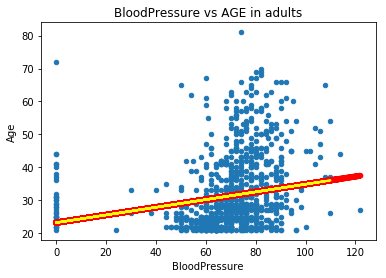

In [16]:
df.plot(kind='scatter',
       x='BloodPressure',
       y='Age', title='BloodPressure vs AGE in adults')
plt.plot(X_train, y_train_pred, color='red', linewidth=6)
plt.plot(X_test, y_test_pred, color='yellow', linewidth=2)

In [17]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [18]:
print(mse(y_train, y_train_pred))
print(mse(y_test, y_test_pred))

137.6783217058769
126.8984952947085


In [19]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.021387220988470124
0.037965126937488325


In [20]:
a,b=model.get_weights()

In [21]:
a

array([[0.11675279]], dtype=float32)

In [22]:
b

array([23.190788], dtype=float32)